<a href="https://colab.research.google.com/github/ananyaiyer/C4ML/blob/master/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
digit  = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digit.load_data()

In [7]:
#checking dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
#normalize
X_train=tf.keras.utils.normalize(X_train)
X_test=tf.keras.utils.normalize(X_test)

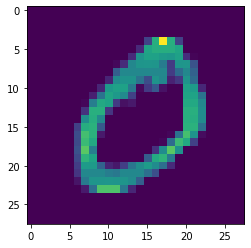

In [16]:
plt.imshow(X_train[1])

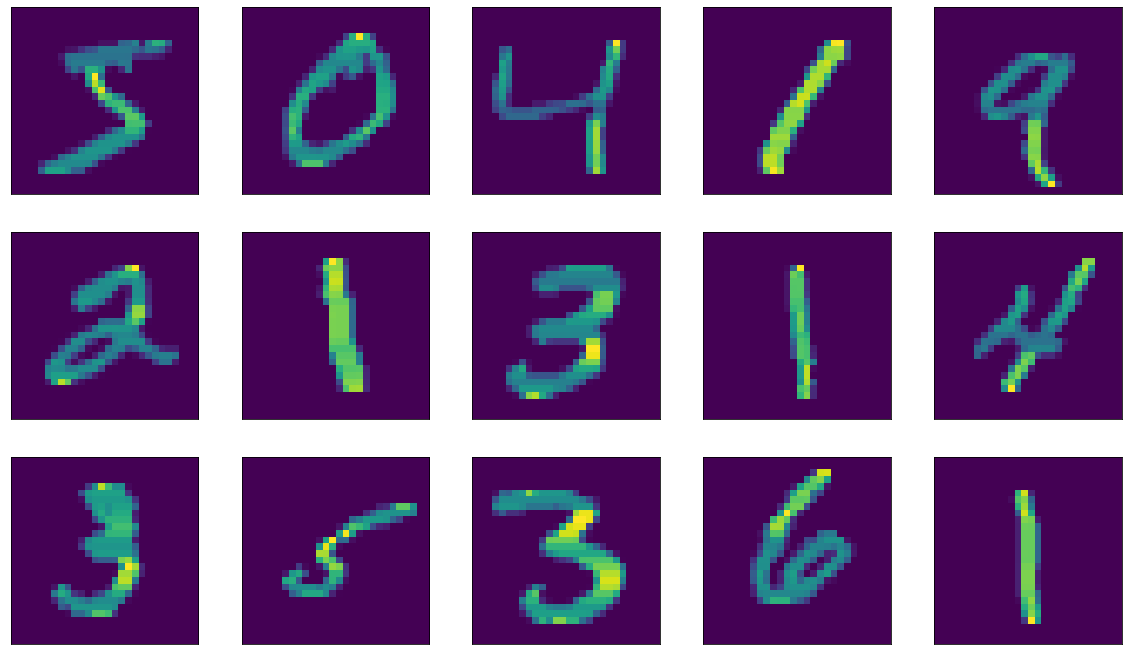

In [68]:
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

In [0]:
#MODEL
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


In [83]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

callback=EarlyStopping(monitor='val_loss',patience = 3,verbose=0,mode='min')

model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,callbacks=[callback],epochs=15)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.1400 - val_accuracy: 0.9793
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.1298 - val_accuracy: 0.9794
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.1724 - val_accuracy: 0.9709
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.1510 - val_accuracy: 0.9755
Epoch 5/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1237 - val_accuracy: 0.9781
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.1277 - val_accuracy: 0.9787
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.1272 - val_accuracy: 0.9761
Epoch 

In [0]:
loss = pd.DataFrame(model.history.history)


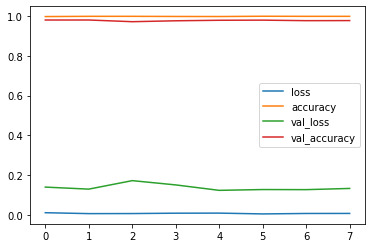

In [85]:
loss.plot()

In [88]:
val_loss, val_acc= model.evaluate(X_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9765
0.13324004411697388 0.9764999747276306


In [93]:
pred = model.predict(X_test)
print(pred)


[[2.3954781e-19 4.0505531e-15 1.4032922e-16 ... 1.0000000e+00
  1.1182628e-19 1.6804293e-14]
 [3.9867450e-18 2.2383828e-19 1.0000000e+00 ... 1.1743751e-15
  1.5986349e-16 4.8357831e-21]
 [4.8388550e-17 9.9999976e-01 1.3613164e-08 ... 1.2680100e-07
  1.7487861e-07 1.1136894e-13]
 ...
 [1.7201284e-18 1.4918783e-15 3.8730954e-14 ... 1.4672761e-15
  5.4506828e-13 5.7220118e-14]
 [2.0839486e-15 5.4325885e-18 2.1243750e-18 ... 1.0663504e-18
  3.7064462e-12 4.4746645e-13]
 [3.3037025e-11 1.7332942e-12 3.5232299e-12 ... 2.4613647e-13
  3.1080994e-13 2.0985713e-15]]


In [95]:
print(np.argmax(pred[1000]))


9


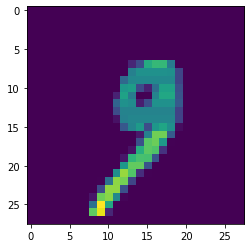

In [97]:
plt.imshow(X_test[1000])
plt.show()

In [98]:
model.save("NUMBER_reader.model")

INFO:tensorflow:Assets written to: NUMBER_reader.model/assets
